### 1. Data preparation: In the data preparation stage, please adopt a comprehensive approach, addressing the following areas:
- 1.1. Handle any missing data by identifying and managing incomplete records or missing values
to ensure the dataset is ready for further analysis.
- 1.2. Perform relevant feature selection by determining which features are most important for
your goal. Additionally, apply feature scaling to normalize the data and ensure all features
contribute equally to the model, avoiding biases due to differing ranges.
- 1.3. Focus on identifying the top-performing suppliers for each task by analysing the cost data.
Since not all suppliers perform equally well, you should remove the worst performing
suppliers from the dataset to make the following tasks more manageable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
tasks = pd.read_csv("tasks.csv", index_col=0)
tasks

,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,TF10,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
Task ID,,,,,,,,,,,,,,,,,,,,,
T1,332,5123,647174452,2111,41.2063244192855%,140069227,22%,1438,0.280695,154237601,...,50,0,93828.91,759621.99,12264068,0,382,0.074566,28150864,0.04
T2,0,5792,327432022,1619,27.9523480662983%,105875589,32%,1097,0.189399,71537962,...,875,0,924983.41,3294170.58,29172807,0,552,0.095304,28894396,0.09
T3,469,4346,547810586,1376,31.6612977450529%,90478530,17%,1097,0.252416,122674168,...,394,0,258487.96,1781016.69,39064840,0,706,0.162448,19579305,0.04
T4,529,7132,700169181,2362,33.1183398766124%,149526281,21%,1474,0.206674,155655199,...,997,0,640011.29,2434120.90,29710103,0,371,0.052019,22272333,0.03
T5,0,4767,278792402,1215,25.4877281308999%,87557248,31%,1038,0.217747,62825715,...,567,0,625549.93,2506860.98,22039095,0,93,0.019509,3058291,0.01
T6,12,3364,184806910,486,14.4470868014268%,33494261,18%,888,0.263971,58465109,...,618,0,634810.70,2153207.49,21161639,0,308,0.091558,15390630,0.08
T7,555,3934,521676289,1039,26.4107778342653%,69762831,13%,943,0.239705,112768389,...,394,0,285558.89,1869912.30,39064840,0,757,0.192425,24164620,0.05
T8,543,3939,521462429,1034,26.2503173394262%,69043102,13%,946,0.240162,112616281,...,394,0,285196.41,1868752.49,39064840,0,736,0.186849,22131127,0.04
T9,1,6187,318294755,1354,21.8845967350897%,68893297,22%,1403,0.226766,97913418,...,926,0,1194896.89,4604756.55,29023894,0,454,0.073380,16180687,0.05


In [3]:
tasks.describe()

,TF1,TF2,TF3,TF4,TF6,TF8,TF9,TF10,TF11,TF12,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
count,130.000000,130.000000,1.300000e+02,130.000000,1.300000e+02,130.000000,130.000000,1.300000e+02,130.000000,130.000000,...,130.000000,130.0,1.300000e+02,1.300000e+02,1.300000e+02,130.0,130.000000,130.000000,1.300000e+02,130.000000
mean,84.253846,4571.053846,5.024507e+08,1538.692308,9.351516e+07,1368.500000,0.301354,1.215590e+08,0.242231,895.115385,...,291.976923,0.0,1.224315e+06,4.844693e+06,4.501910e+07,0.0,400.676923,0.089118,1.739305e+07,0.036308
std,190.404641,1544.385286,1.174136e+08,687.657622,3.990460e+07,505.682826,0.048762,3.766269e+07,0.048962,381.652133,...,232.254454,0.0,8.246296e+05,2.409465e+06,1.393084e+07,0.0,294.171026,0.062669,1.189388e+07,0.026359
min,0.000000,1127.000000,7.149093e+07,367.000000,2.009111e+07,223.000000,0.189399,9.828626e+06,0.140000,239.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,30.000000,0.011561,1.031294e+06,0.000000
25%,1.000000,3280.750000,4.307861e+08,1014.000000,6.238838e+07,983.500000,0.265802,9.434631e+07,0.210000,610.500000,...,159.500000,0.0,5.392200e+05,2.661375e+06,3.611170e+07,0.0,174.250000,0.042033,8.118016e+06,0.020000
50%,1.000000,4317.000000,5.057017e+08,1386.500000,8.541451e+07,1235.500000,0.302988,1.121406e+08,0.225000,765.500000,...,205.500000,0.0,1.071940e+06,4.672663e+06,4.785266e+07,0.0,284.500000,0.070037,1.438748e+07,0.030000
75%,2.750000,5958.000000,5.735017e+08,2060.000000,1.215219e+08,1586.250000,0.341108,1.511381e+08,0.270000,1214.750000,...,382.000000,0.0,1.869915e+06,7.175128e+06,5.450476e+07,0.0,564.000000,0.115469,2.375741e+07,0.050000
max,706.000000,7908.000000,7.699058e+08,3344.000000,1.906866e+08,2536.000000,0.388069,1.976945e+08,0.390000,1645.000000,...,1244.000000,0.0,3.705798e+06,8.753350e+06,6.992045e+07,0.0,1211.000000,0.328786,5.880575e+07,0.120000


### Missing values

In [4]:
tasks.isnull().values.any() # Returns True when there is at least one missing value occurring in the data

False

In [5]:
tasks.isna().sum().sum() # Rreturns the number of missing values in the dataset

0

There is no missing values in `tasks.csv`.

In [6]:
# Convert percentage(%) to float

tasks["TF5"] = tasks["TF5"].str.strip("%").astype(float)/100
tasks["TF7"] = tasks["TF7"].str.strip("%").astype(float)/100

### Data standardization

In [7]:
# Scale Features

from sklearn.preprocessing import StandardScaler

# Initialise the Scaler

scaler = StandardScaler()
# To scale data
scaled_tasks = scaler.fit_transform(tasks)
scaled_tasks = pd.DataFrame(scaled_tasks, columns = tasks.columns, index = tasks.index)
scaled_tasks

,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,TF10,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
Task ID,,,,,,,,,,,,,,,,,,,,,
T1,1.306190,0.358771,1.237366,0.835476,0.975531,1.171147,0.492049,0.137970,-0.425319,0.871023,...,-1.045892,0.0,-1.376205,-1.701985,-2.360357,0.0,-0.063736,-0.233112,0.907982,0.140620
T2,-0.444211,0.793629,-1.496383,0.117236,-0.656726,0.310948,1.942532,-0.538975,-2.304834,-1.333269,...,2.519988,0.0,-0.364394,-0.646003,-1.141898,0.0,0.516395,0.099082,0.970738,2.044856
T3,2.028493,-0.146288,0.387820,-0.237504,-0.199960,-0.076392,-0.233193,-0.538975,-1.007499,0.029725,...,0.440972,0.0,-1.175757,-1.276436,-0.429069,0.0,1.041925,1.174633,0.184525,0.140620
T4,2.344831,1.664645,1.690463,1.201896,-0.020522,1.409056,0.347000,0.209436,-1.949192,0.908808,...,3.047306,0.0,-0.711307,-1.004330,-1.103180,0.0,-0.101273,-0.594274,0.411822,-0.240227
T5,-0.444211,0.127367,-1.912244,-0.472538,-0.960249,-0.149881,1.797484,-0.656100,-1.721234,-1.565487,...,1.188726,0.0,-0.728911,-0.974024,-1.655960,0.0,-1.049958,-1.115034,-1.209884,-1.001921
T6,-0.380943,-0.784599,-2.715806,-1.536760,-2.319929,-1.509928,-0.088145,-0.953876,-0.769606,-1.681715,...,1.409163,0.0,-0.717638,-1.121368,-1.719190,0.0,-0.316263,0.039074,-0.169008,1.664009
T7,2.481910,-0.414092,0.164376,-0.729470,-0.846574,-0.597530,-0.813387,-0.844692,-1.269179,-0.234305,...,0.440972,0.0,-1.142802,-1.239399,-0.429069,0.0,1.215964,1.654816,0.571535,0.521467
T8,2.418643,-0.410842,0.162548,-0.736769,-0.866335,-0.615636,-0.813387,-0.838736,-1.259764,-0.238360,...,0.440972,0.0,-1.143243,-1.239882,-0.429069,0.0,1.144301,1.565504,0.399904,0.140620
T9,-0.438938,1.050384,-1.574505,-0.269621,-1.403983,-0.619405,0.492049,0.068489,-1.535563,-0.630253,...,2.740424,0.0,-0.035813,-0.099966,-1.152629,0.0,0.181967,-0.252110,-0.102326,0.521467


### Drop the columns which have high correlation

In [8]:
import numpy as np

# Ensure no NaN values in the dataset
data_cleaned = scaled_tasks.dropna()

# Compute the correlation matrix
correlation_matrix = data_cleaned.corr()

# Set the threshold for dropping features
threshold = 0.8

# Create a mask for the upper triangle
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)

# Identify columns to drop (keep only one column for each correlated pair)
columns_to_drop = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Upper triangle check
        if correlation_matrix.iloc[i, j] > threshold:  # High correlation
            colname = correlation_matrix.columns[j]  # Keep one column
            columns_to_drop.append(colname)

# Drop duplicate columns from the dataset
columns_to_drop = list(set(columns_to_drop))  # Remove duplicates
data_reduced = data_cleaned.drop(columns=columns_to_drop)
# data_reduced.reset_index()

# Print results
print(f"Columns dropped due to high correlation: {columns_to_drop}")
print(f"Remaining columns: {data_reduced.columns.tolist()}")

new_tasks = scaled_tasks.drop(columns = columns_to_drop)
# new_tasks.reset_index(drop=True, inplace=True)
print(new_tasks)


Columns dropped due to high correlation: ['TF78', 'TF70', 'TF51', 'TF71', 'TF48', 'TF114', 'TF107', 'TF76', 'TF65', 'TF97', 'TF93', 'TF89', 'TF34', 'TF95', 'TF36', 'TF43', 'TF73', 'TF24', 'TF94', 'TF116', 'TF15', 'TF10', 'TF98', 'TF14', 'TF106', 'TF45', 'TF66', 'TF49', 'TF4', 'TF40', 'TF90', 'TF59', 'TF54', 'TF115', 'TF26', 'TF44', 'TF62', 'TF87', 'TF56', 'TF74', 'TF110', 'TF53', 'TF57', 'TF103', 'TF102', 'TF80', 'TF86', 'TF28', 'TF111', 'TF81', 'TF12', 'TF60', 'TF82', 'TF101', 'TF50', 'TF68', 'TF8', 'TF41', 'TF30', 'TF63', 'TF99', 'TF42', 'TF83', 'TF77', 'TF29', 'TF72', 'TF22', 'TF91', 'TF6', 'TF25', 'TF58']
Remaining columns: ['TF1', 'TF2', 'TF3', 'TF5', 'TF7', 'TF9', 'TF11', 'TF13', 'TF16', 'TF17', 'TF18', 'TF19', 'TF20', 'TF21', 'TF23', 'TF27', 'TF31', 'TF32', 'TF33', 'TF35', 'TF37', 'TF38', 'TF39', 'TF46', 'TF47', 'TF52', 'TF55', 'TF61', 'TF64', 'TF67', 'TF69', 'TF75', 'TF79', 'TF84', 'TF85', 'TF88', 'TF92', 'TF96', 'TF100', 'TF104', 'TF105', 'TF108', 'TF109', 'TF112', 'TF113']
  

In [9]:
new_tasks.head()

,TF1,TF2,TF3,TF5,TF7,TF9,TF11,TF13,TF16,TF17,...,TF88,TF92,TF96,TF100,TF104,TF105,TF108,TF109,TF112,TF113
Task ID,,,,,,,,,,,,,,,,,,,,,
T1,1.306190,0.358771,1.237366,0.975531,0.492049,-0.425319,-0.045737,1.655600,-0.976970,-1.804008,...,0.0,0.0,0.0,0.0,0.0,-0.555310,0.0,-1.376205,0.0,-0.063736
T2,-0.444211,0.793629,-1.496383,-0.656726,1.942532,-2.304834,-0.455795,-1.492105,2.616018,1.398681,...,0.0,0.0,0.0,0.0,0.0,1.367617,0.0,-0.364394,0.0,0.516395
T3,2.028493,-0.146288,0.387820,-0.199960,-0.233193,-1.007499,-0.455795,0.000609,-0.244006,-1.550838,...,0.0,0.0,0.0,0.0,0.0,-0.271779,0.0,-1.175757,0.0,1.041925
T4,2.344831,1.664645,1.690463,-0.020522,0.347000,-1.949192,-0.455795,-0.533499,2.265682,1.297247,...,0.0,0.0,0.0,0.0,0.0,0.845991,0.0,-0.711307,0.0,-0.101273
T5,-0.444211,0.127367,-1.912244,-0.960249,1.797484,-1.721234,-0.250766,-0.723295,1.946536,1.211864,...,0.0,0.0,0.0,0.0,0.0,0.560036,0.0,-0.728911,0.0,-1.049958


### Remove the columns that only contain zero

In [10]:
# Remove columns that contain only 0.0 values
columns_to_keep = (new_tasks != 0.0).any(axis=0)  # Identify columns with at least one non-zero value
new_tasks = new_tasks.loc[:, columns_to_keep]    # Keep only these columns

# Print the updated DataFrame
print(new_tasks.head())

              TF1       TF2       TF3       TF5       TF7       TF9      TF11  \
Task ID                                                                         
T1       1.306190  0.358771  1.237366  0.975531  0.492049 -0.425319 -0.045737   
T2      -0.444211  0.793629 -1.496383 -0.656726  1.942532 -2.304834 -0.455795   
T3       2.028493 -0.146288  0.387820 -0.199960 -0.233193 -1.007499 -0.455795   
T4       2.344831  1.664645  1.690463 -0.020522  0.347000 -1.949192 -0.455795   
T5      -0.444211  0.127367 -1.912244 -0.960249  1.797484 -1.721234 -0.250766   

             TF13      TF16      TF17    ...         TF52      TF55      TF61  \
Task ID                                  ...                                    
T1       1.655600 -0.976970 -1.804008    ...    -0.753586 -1.203177 -0.508838   
T2      -1.492105  2.616018  1.398681    ...     2.129191 -1.508473 -1.085718   
T3       0.000609 -0.244006 -1.550838    ...     0.065827 -0.592586 -0.316544   
T4      -0.533499  2.265682

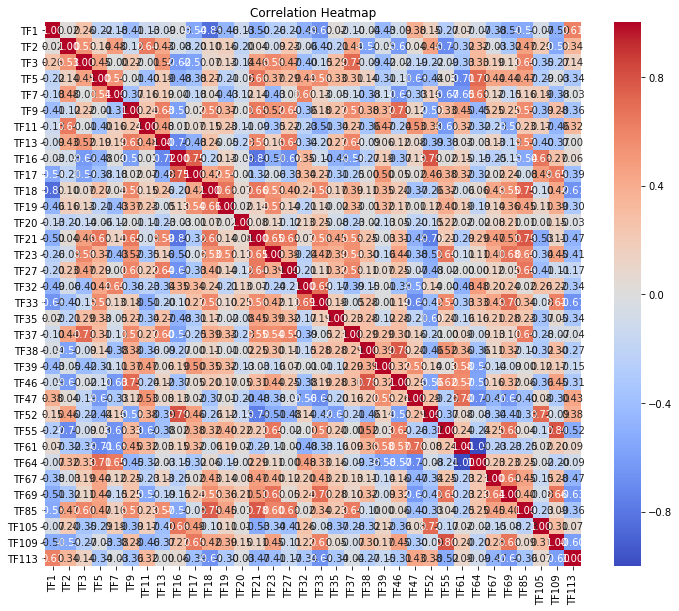

In [11]:
# Calculate correlation matrix
correlation_matrix = new_tasks.select_dtypes(include=['float64']).corr()
# Create heatmap for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Feature Selection - PCA

In [12]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Apply PCA with 10 components
pca = PCA(n_components=10)
pca.fit(new_tasks).transform(new_tasks)  # Transform the data

# pca.n_components_
# pca.explained_variance_ratio_
# np.cumsum(pca.explained_variance_ratio_)

transformed_data = pca.transform(new_tasks)
print("\nTransformed Data (Projected Data):")
print(transformed_data)



Transformed Data (Projected Data):
[[ 1.07213618  4.1120748  -1.41261548 ...  0.16475232  0.57596224
  -0.58487463]
 [ 5.5826511  -0.4310891   3.1892396  ... -0.85881103 -1.02760011
   0.10092392]
 [ 3.40880802  2.28574142 -0.3682022  ... -0.04446751  0.10839346
   0.32142611]
 ...
 [-2.71037926 -2.20567874 -2.5379896  ...  1.16202853  0.35561367
  -0.55383907]
 [-3.18865367 -1.88035798 -2.76342159 ...  0.5940242   1.85387253
  -0.88029025]
 [-3.13230132 -1.97319657 -2.9602185  ...  1.4528716   0.87096303
  -0.81399115]]
